In [2]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import datetime
from statsmodels.stats.power import zt_ind_solve_power

In [3]:
alpha_key = 'Y8YQFOIVHPA381U4'
function = 'TIME_SERIES_DAILY'
symbol = 'XLV'


## Load XLV API 
#### Create percent change column

In [12]:
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [13]:
response = requests.get(url)
xlv_file = response.json()
xlv_file.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [14]:
xlv_values = xlv_file['Time Series (Daily)']

In [16]:
df = pd.DataFrame(xlv_values)
xlv_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
xlv_df.columns = column_head
xlv_df.reset_index(inplace = True)

In [17]:
xlv_df['open'] = xlv_df.open.astype(float)
xlv_df['high'] = xlv_df.high.astype(float)
xlv_df['low'] = xlv_df.low.astype(float)
xlv_df['close'] = xlv_df.close.astype(float)
xlv_df['volume'] = xlv_df.volume.astype(float)

In [18]:
xlv_df['day_pct_change'] = (xlv_df['close']-xlv_df['open'])/xlv_df['open']*100

In [19]:
for entry in xlv_df:
    pct_change = (xlv_df['close'] - xlv_df['open'].iloc[-1])/xlv_df['open'].iloc[-1]
    xlv_df['overall_pct_change'] = pct_change * 100

In [20]:
column_heads = ['date','open','close', 'high','low','volume', 'day_pct_change', 'overall_pct_change']
xlv_df.columns = column_heads

In [21]:
xlv_df.head()


,date,open,close,high,low,volume,day_pct_change,overall_pct_change
0,2019-12-12,100.07,101.28,100.020,100.33,3780933.0,0.259818,231.669421
1,2019-12-11,100.01,100.27,99.820,100.02,6010787.0,0.009999,230.644628
2,2019-12-10,99.69,100.02,99.295,99.93,6027927.0,0.240746,230.347107
3,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,229.619835
4,2019-12-06,100.27,100.75,100.200,100.41,5658514.0,0.139623,231.933884


## XLV - 1 Year 

In [22]:
xlv_1_year_changes = []
for i in xlv_df['date'][0:365]:
    xlv_1_year_changes.append(xlv_df['day_pct_change'])

## Load S&P API


In [23]:
sp_symbol = '.INX'
url_sp = f"https://www.alphavantage.co/query?function={function}&symbol={sp_symbol}&outputsize=full&apikey={alpha_key}"

In [24]:
response2 = requests.get(url_sp)
sp_file = response2.json()

In [25]:
sp_values = sp_file['Time Series (Daily)']
sp_df = pd.DataFrame(sp_values)
sp_df = sp_df.T
sp_df.columns = column_head
sp_df['open'] = sp_df.open.astype(float)
sp_df['high'] = sp_df.high.astype(float)
sp_df['low'] = sp_df.low.astype(float)
sp_df['close'] = sp_df.close.astype(float)
sp_df['volume'] = sp_df.volume.astype(float)

In [26]:
sp_df['day_pct_change'] = (sp_df['close']-sp_df['open'])/sp_df['open']*100

In [58]:
for entry in sp_df:
    pct_change = (sp_df['close'] - sp_df['open'].iloc[-1])/sp_df['open'].iloc[-1]
    sp_df['overall_pct_change'] = pct_change * 100

In [62]:
xlv_df.head()

,date,open,close,high,low,volume,day_pct_change,overall_pct_change
0,2019-12-12,100.07,101.28,100.020,100.33,3780933.0,0.259818,231.669421
1,2019-12-11,100.01,100.27,99.820,100.02,6010787.0,0.009999,230.644628
2,2019-12-10,99.69,100.02,99.295,99.93,6027927.0,0.240746,230.347107
3,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,229.619835
4,2019-12-06,100.27,100.75,100.200,100.41,5658514.0,0.139623,231.933884


In [61]:
xlv_df.tail()

,date,open,close,high,low,volume,day_pct_change,overall_pct_change
5029,1999-12-16,29.63,29.73,29.38,29.73,9500.0,0.337496,-1.719008
5030,1999-12-15,29.56,29.91,29.45,29.50,8400.0,-0.202977,-2.479339
5031,1999-12-14,29.53,29.83,29.53,29.75,16000.0,0.745005,-1.652893
5032,1999-12-13,29.69,29.95,29.69,29.69,10700.0,0.000000,-1.851240
5033,1999-12-10,30.25,30.25,29.77,29.89,18800.0,-1.190083,-1.190083


In [28]:
xlv_df.describe()

,open,close,high,low,volume,day_pct_change,overall_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000,5034.000000
mean,45.319958,45.585874,45.021568,45.319007,5.179987e+06,-0.003092,49.814898
std,21.762785,21.860668,21.656908,21.768396,5.489555e+06,0.997350,71.961639
min,21.750000,22.100000,21.000000,21.880000,9.000000e+02,-8.646889,-27.669421
25%,29.550000,29.730000,29.350000,29.550000,4.521500e+05,-0.484426,-2.314050
50%,32.910000,33.085000,32.685550,32.920000,4.414275e+06,0.021669,8.826446
75%,66.870000,67.381250,66.040000,66.860000,7.780256e+06,0.505704,121.024793
max,100.450000,101.280000,100.200000,100.410000,6.647018e+07,8.372274,231.933884


In [29]:
sp_df.describe()

,open,high,low,close,volume,day_pct_change,overall_pct_change
count,5019.000000,5019.000000,5019.000000,5019.000000,5.019000e+03,5019.000000,5019.000000
mean,1570.910802,1579.796991,1561.282136,1571.090687,3.090349e+09,0.017022,6.931474
std,581.034326,581.784703,580.130838,581.124251,1.474671e+09,1.138653,39.552442
min,679.280000,695.270000,666.790000,676.530000,3.560700e+08,-8.723105,-53.954058
25%,1151.250000,1159.640000,1141.960000,1151.045050,1.668240e+09,-0.447641,-21.657645
50%,1360.050000,1368.390000,1348.720000,1360.160000,3.218590e+09,0.051937,-7.424877
75%,1980.245000,1988.599950,1972.275050,1981.950000,3.917700e+09,0.520042,34.895355
max,3147.179900,3176.280000,3143.409900,3153.629900,1.145623e+10,10.789002,114.642158


### S&P 1 - year

In [30]:
xlv_1_year_changes = []
for i in xlv_df['date'][0:365]:
    xlv_1_year_changes.append(xlv_df['day_pct_change'])

In [31]:
xlv_avg_percent_moves = sum(xlv_1_year_changes)/len(xlv_1_year_changes)
xlv_1_year_samples = []
for i in range(100):
    xlv_1_year_sample = np.random.choice(xlv_avg_percent_moves, size = 50)
    xlv_1_year_samples.append(xlv_1_year_sample)



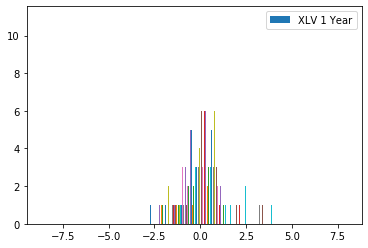

In [32]:
plt.hist(xlv_1_year_samples, bins = 100, label = 'XLV 1 Year');
plt.legend();

In [33]:
x_hat = sum(xlv_1_year_samples)/len(xlv_1_year_samples)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 365

z_stat_xlv_1_yr = (x_hat - mu)/sigma/math.sqrt(n)
z_stat_xlv_1_yr.mean()

NameError: name 'sp_avg_percent_moves' is not defined

## Hypothesis 1 Testing: Average Returns

#### H0: The daily avg percent change in the XLV index fund is <= to that of the overall S&P 500 
#### HA: The daily avg percent change in the XLV index fund is greater than the S&P 500 

In [34]:
xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())


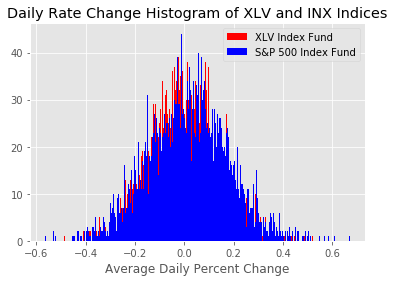

In [35]:
plt.style.use('ggplot')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Index Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index Fund');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change Histogram of XLV and INX Indices')
plt.legend();

In [36]:
#Z-test stat for S&P benchmark group
import statistics
x_hat = sum(xlv_avg_percent_moves)/len(xlv_avg_percent_moves)
mu = sum(sp_avg_percent_moves)/len(xlv_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5017

In [37]:
z_stat = (x_hat - mu)/sigma/math.sqrt(n)
p_val = stats.norm.cdf(z_stat)

In [38]:
#take a t test to see if there is a statistical significance in difference of means
S = statistics.stdev(xlv_avg_percent_moves)
t_stat = (x_hat - mu)/S/math.sqrt(n)

*Due to the Z-stat and T-stat we fail to reject H0*

In [47]:
#Calculating Cohen's D (d = u1 - u2/std_pooled) (include)
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

xlv_sp_cohen_d = cohen_d(xlv_df['day_pct_change'], sp_df['day_pct_change'])
print(f"XLV-S&P Cohen's D: {xlv_sp_cohen_d}")

XLV-S&P Cohen's D: -0.01879416462249286


In [46]:
n_xlv = len(xlv_df['day_pct_change'])
n_sp = len(sp_df['day_pct_change'])
ration = n_xlv/n_sp
xlv_sp_power = zt_ind_solve_power(effect_size = xlv_sp_cohen_d, nobs1=n_xlv, power = None, alpha = .05)
print(f"XLV-SP Power: {xlv_sp_power}")
alpha = 1 - xlv_sp_power
alpha

XLV-SP Power: 0.1564098277166994


0.8435901722833006

In [48]:
#z_score * SE = real difference in sample and population means
std_error = sigma/math.sqrt(n)
real_diff_xlv = std_error * z_stat
print(f"XLV P-Value: {p_val}")
print(f"XLV Z-Stat: {z_stat}")
print(f"XLV T-stat: {t_stat}")
print(f"XLV Standard_error: {std_error}")
print(f"XLV Real Difference: {real_diff_xlv}")

#include p-value, z-stat, standard-error, 

XLV P-Value: 0.49927136663408406
XLV Z-Stat: -0.001826414012265652
XLV T-stat: -0.0021217301601791534
XLV Standard_error: 0.002291983015619791
XLV Real Difference: -4.186109895602871e-06


In [52]:
std_dev_sp = np.std(sp_avg_percent_moves)
std_dev_sp



0.1623267194177142

## Johnson & Johnson Performance

In [39]:
symbol = 'JNJ'
function = 'TIME_SERIES_DAILY'
alpha_key = 'Y8YQFOIVHPA381U4'
jj_url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [40]:
response3 = requests.get(jj_url)
jj_file = response3.json()

In [41]:
jj_values = jj_file['Time Series (Daily)']
df = pd.DataFrame(jj_values)
jj_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
jj_df.columns = column_head
jj_df.reset_index(inplace = True)
jj_df['open'] = jj_df.open.astype(float)
jj_df['high'] = jj_df.high.astype(float)
jj_df['low'] = jj_df.low.astype(float)
jj_df['close'] = jj_df.close.astype(float)
jj_df['volume'] = jj_df.volume.astype(float)
jj_df['day_pct_change'] = (jj_df['close']-jj_df['open'])/jj_df['open']*100
for entry in jj_df:
    pct_change = (jj_df['close'] - jj_df['open'].iloc[-1])/jj_df['open'].iloc[-1]
    sp_df['overall_pct_change'] = pct_change * 100
    


In [42]:
jj_df.describe()

,open,high,low,close,volume,day_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000
mean,81.503829,82.090497,80.898182,81.515462,8.913550e+06,0.020890
std,27.528939,27.677021,27.366372,27.527488,4.899298e+06,1.021164
min,41.500000,43.600000,41.020000,41.850000,1.348570e+05,-8.077905
25%,60.625000,61.000000,60.202500,60.590000,5.885100e+06,-0.466679
50%,66.500000,66.940000,66.150000,66.515000,7.926250e+06,0.016789
75%,100.560000,101.067500,99.960000,100.520000,1.066302e+07,0.530695
max,147.840000,148.990000,147.000000,148.140000,9.844020e+07,8.016304


0.141149372244937

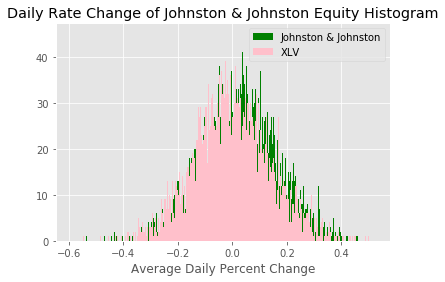

In [53]:
jj_avg_pct_moves = []

for i in range(5000):
    sample_jj = jj_df.sample(n=50, random_state = i)
    jj_avg_pct_moves.append(sample_jj.day_pct_change.mean())

plt.style.use('ggplot')
plt.hist(jj_avg_pct_moves, bins = 500, color = 'green', label = 'Johnston & Johnston');
# plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change of Johnston & Johnston Equity Histogram')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

std_dev_jj = np.std(jj_avg_pct_moves)
std_dev_jj

In [ ]:
x_hat = sum(jj_avg_pct_moves)/len(sp_avg_percent_moves)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5034

z_stat_jj = (x_hat - mu)/sigma/math.sqrt(n)
p_val_jj = stats.norm.cdf(z_stat_jj)
S_jj = statistics.stdev(jj_avg_pct_moves)
t_stat_jj = (x_hat - mu)/S/math.sqrt(n)
std_error_jj = sigma/math.sqrt(n)
real_difference_jj = std_error_jj * z_stat_jj
print(f"JNJ Z-Stat: {z_stat_jj}")
print(f"JNJ P-Value: {p_val_jj}")
print(f"JNJ T-Stat: {t_stat_jj}")
print(f"JNJ Standard Error: {std_error_jj}")
print(f"JNJ Real Difference: {real_difference_jj}")

## DVA 


In [ ]:
symbol = 'DVA'
function = 'TIME_SERIES_DAILY'
alpha_key = 'Y8YQFOIVHPA381U4'
dva_url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [ ]:
response3 = requests.get(dva_url)
dva_file = response3.json()

In [ ]:
dva_values = dva_file['Time Series (Daily)']
df = pd.DataFrame(dva_values)
dva_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
dva_df.columns = column_head
dva_df.reset_index(inplace = True)
dva_df['open'] = dva_df.open.astype(float)
dva_df['high'] = dva_df.high.astype(float)
dva_df['low'] = dva_df.low.astype(float)
dva_df['close'] = dva_df.close.astype(float)
dva_df['volume'] = dva_df.volume.astype(float)
dva_df['day_pct_change'] = (dva_df['close']-dva_df['open'])/dva_df['open']*100
for entry in dva_df:
    pct_change = (dva_df['close'] - dva_df['open'].iloc[-1])/dva_df['open'].iloc[-1]
    dva_df['overall_pct_change'] = pct_change * 100
    

In [ ]:
dva_df.describe()

In [ ]:
dva_avg_pct_moves = []

for i in range(5000):
    sample_dva = dva_df.sample(n=50, random_state = i)
    dva_avg_pct_moves.append(sample_dva.day_pct_change.mean())

plt.style.use('ggplot')    
plt.hist(dva_avg_pct_moves, bins = 500, color = 'green', label = 'DVA');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

In [ ]:
x_hat = sum(dva_avg_pct_moves)/len(dva_avg_pct_moves)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5034

z_stat_dva = (x_hat - mu)/sigma/math.sqrt(n)
p_val_dva = stats.norm.cdf(z_stat_dva)
S_dva = statistics.stdev(dva_avg_pct_moves)
t_stat_dva = (x_hat - mu)/S/math.sqrt(n)
std_error_dva = sigma/math.sqrt(n)
real_difference_dva = std_error_dva * z_stat_dva
print(f"DVA Z-Stat: {z_stat_dva}")
print(f"DVA P-Value: {p_val_dva}")
print(f"DVA T-Stat: {t_stat_dva}")
print(f"DVA Standard Error: {std_error_dva}")
print(f"DVA Real Difference: {real_difference_dva}")